# Deep Learning을 활용한 웜톤 & 쿨톤 Classification

## By OPTIMUM
***
우선 저희를 찾아주셔서 감사드리며 분석 진행 프로세스를 간단하게 설명드리겠습니다.

- 1. 데이터 수집(웜톤 & 쿨톤 - 총 000장)
- 2. 데이터 전처리(중복 사진 제거 + 무관한 사진 제거)
- 3. 데이터 분할(학습 / 검증 / 시험)
- 4. CNN 모델링(학습 & 검증 데이터 활용)
- 5. 최고 성능을 기록한 모델로 시험 데이터를 예측 후 평가

위와 같은 순으로 진행되었으며 코드 환경은 Google의 Colab을 활용하였습니다.

colab 활용법은 아래 url을 참고하시길 바랍니다!

https://velog.io/@s6820w/colab1

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


colab에서 ipynb를 사용하는데 file을 호출하기 위해 위의 코드를 실행시켜주고 url에 접속하여 비밀번호를 복사해 공란에 입력합니다.

In [2]:
import pandas as pd
import os, shutil

In [ ]:
사진들을 학습 / 검증 / 시험용으로 분리하기 위해 위의 두 라이브러리를 호출합니다.

In [ ]:
filenames = os.listdir("/content/gdrive/My Drive/optimum/warm_cool/")
categories = []
for filename in filenames:
  if filename[:3] == '웜':
      categories.append(1)
  else:
      categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

사진 저장을 웜톤000, 쿨톤000으로 저장했기 때문에 "웜"이라는 글자가 들어간 파일명의 category를 1로 그렇지 않은 것을 0으로 처리하였습니다.

위의 warm_cool 디렉토리는 맨 처음에 모든 사진이 저장된 디렉토리 입니다. 중복 사진 및 무관한 사진을 제거한 후 폴더를 업로드 하신 후에 진행하셔도 되고 우선 폴더를 업로드 한 후 google drive에서 삭제하셔도 됩니다.

In [ ]:
df

,filename,category
0,웜톤131.jpg,1
1,웜톤130.jpg,1
2,웜톤13.jpg,1
3,웜톤129.jpg,1
4,웜톤127.jpg,1
...,...,...
1988,쿨톤972.jpg,0
1989,쿨톤971.jpg,0
1990,쿨톤969.jpg,0
1991,쿨톤970.jpg,0


실제 사진 별로 웜톤 or 쿨톤 여부를 category 열에 표시해 두었습니다.

#### 사진 데이터 분할 후 디렉토리에 저장

In [1]:
base_dir = '/content/gdrive/My Drive/optimum/wc2'
os.mkdir(base_dir)

google drive 내에 고객님께서 사진을 분할하여 저장할 가장 상위 폴더를 생성합니다.

/content/gdrive/My Drive는 고정이며 뒤에 고객님만의 디렉토리 주소를 생성하시면 됩니다!

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

학습데이터 전체가 들어갈 폴더를 train이라는 이름으로 생성합니다.

현재 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/train 입니다.

In [ ]:
val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)

검증데이터 전체가 들어갈 폴더를 val이라는 이름으로 생성합니다.

현재 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/val 입니다.

In [ ]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

시험데이터 전체가 들어갈 폴더를 test이라는 이름으로 생성합니다.

현재 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/test 입니다.

In [ ]:
train_cool_dir = os.path.join(train_dir, 'cool')
os.mkdir(train_cool_dir)

쿨톤 사진 중 훈련 데이터로 사용할 데이터를 cool이라는 폴더에 저장합니다.

해당 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/train/cool 입니다.

In [ ]:
train_warm_dir = os.path.join(train_dir, 'warm')
os.mkdir(train_warm_dir)

웜톤 사진 중 훈련 데이터로 사용할 데이터를 warm이라는 폴더에 저장합니다.

해당 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/train/warm 입니다.

In [ ]:
val_cool_dir = os.path.join(val_dir, 'cool')
os.mkdir(val_cool_dir)

쿨톤 사진 중 검증 데이터로 사용할 데이터를 cool이라는 폴더에 저장합니다.

해당 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/val/cool 입니다.

In [ ]:
val_warm_dir = os.path.join(val_dir, 'warm')
os.mkdir(val_warm_dir)

웜톤 사진 중 검증 데이터로 사용할 데이터를 warm이라는 폴더에 저장합니다.

해당 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/val/warm 입니다.

In [ ]:
test_cool_dir = os.path.join(test_dir, 'cool')
os.mkdir(test_cool_dir)

쿨톤 사진 중 시험 데이터로 사용할 데이터를 cool이라는 폴더에 저장합니다.

해당 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/test/cool 입니다.

In [ ]:
test_warm_dir = os.path.join(test_dir, 'warm')
os.mkdir(test_warm_dir)

웜톤 사진 중 시험 데이터로 사용할 데이터를 warm이라는 폴더에 저장합니다.

해당 폴더 주소는 /content/gdrive/My Drive/optimum/wc2/test/warm 입니다.

위 코드를 모두 실행하면 저장해둔 사진들이 자동으로 훈련 / 검증 / 시험 폴더에 카테고리 별로 분리가 되어 저장됩니다.
***

In [ ]:
for fname in sorted(filenames)[:750] :
  src = os.path.join('/content/gdrive/My Drive/optimum/warm_cool', fname)
  dst = os.path.join(train_warm_dir, fname)
  shutil.copyfile(src, dst)

전체 파일명을 오름차순으로 정렬한 후 처음 750개의 데이터(웜톤1 ~ 750)를 위에서 만들어둔 /content/gdrive/My Drive/optimum/wc2/train/warm에 실제로 저장합니다.

In [ ]:
for fname in sorted(filenames)[750:900] :
  src = os.path.join('/content/gdrive/My Drive/optimum/warm_cool', fname)
  dst = os.path.join(val_warm_dir, fname)
  shutil.copyfile(src, dst)

전체 파일명을 오름차순으로 정렬한 후 이후 150개의 데이터(웜톤750 ~ 900)를 위에서 만들어둔 /content/gdrive/My Drive/optimum/wc2/val/warm에 실제로 저장합니다.

In [ ]:
for fname in sorted(filenames)[900:996] :
  src = os.path.join('/content/gdrive/My Drive/optimum/warm_cool', fname)
  dst = os.path.join(test_warm_dir, fname)
  shutil.copyfile(src, dst)

전체 파일명을 오름차순으로 정렬한 후 이후 96개의 데이터(웜톤900 ~ 996)를 위에서 만들어둔 /content/gdrive/My Drive/optimum/wc2/test/warm에 실제로 저장합니다.

이렇게 해서 웜톤 사진들은 모두 분할을 완료하였습니다.

In [ ]:
for fname in sorted(filenames)[996:1746] :
  src = os.path.join('/content/gdrive/My Drive/optimum/warm_cool', fname)
  dst = os.path.join(train_cool_dir, fname)
  shutil.copyfile(src, dst)

전체 파일명을 오름차순으로 정렬한 후 처음 750개의 데이터(쿨톤1 ~ 750)를 위에서 만들어둔 /content/gdrive/My Drive/optimum/wc2/train/cool에 실제로 저장합니다.

In [ ]:
for fname in sorted(filenames)[1746:1896] :
  src = os.path.join('/content/gdrive/My Drive/optimum/warm_cool', fname)
  dst = os.path.join(val_cool_dir, fname)
  shutil.copyfile(src, dst)

전체 파일명을 오름차순으로 정렬한 후 이후 150개의 데이터(쿨톤750 ~ 900)를 위에서 만들어둔 /content/gdrive/My Drive/optimum/wc2/val/cool에 실제로 저장합니다.

In [ ]:
for fname in sorted(filenames)[1896:] :
  src = os.path.join('/content/gdrive/My Drive/optimum/warm_cool', fname)
  dst = os.path.join(test_cool_dir, fname)
  shutil.copyfile(src, dst)

전체 파일명을 오름차순으로 정렬한 후 나머지 모든 쿨톤 데이터를 위에서 만들어둔 /content/gdrive/My Drive/optimum/wc2/test/cool에 실제로 저장합니다.

이렇게 해서 모든 데이터 분할을 완료되었습니다.

이제 모델링을 진행하겠습니다.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGeneratorㅠㅡ

딥러닝 활용을 위해 tensorflow 프레임워크의 keras 라이브러리의 하위 메서드를 호출합니다.

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range = 35,
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.4,
    horizontal_flip = True,
    width_shift_range = 0.15,
    height_shift_range = 0.15
)

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/optimum/wc2/train/', 
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 16
)

Found 1413 images belonging to 2 classes.


앞서 쿨톤 웜톤의 훈련용 데이터 중에서 중복 사진과 무관한 사진을  제거한 후 1500개의 샘플에서 1413개의 샘플이 있는 것을 확인하였고 해당 사진들로 훈련용 데이터를 만들었습니다.

데이터 수가 적어 데이터 증강을 위해 사진별로 각도 변환, 줌 인-아웃 등 다양한 방법을 적용할 수 있는 ImageGenerator 메서드를 사용해 훈련용 데이터의 양을 늘렸습니다.

In [5]:
test_datagen = ImageDataGenerator(rescale = 1 / 255)

validation_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/optimum/wc2/val/',
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary'
)

Found 291 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/optimum/wc2/test/',
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary'
)

Found 174 images belonging to 2 classes.


검증용과 시험용의 경우 미지의 데이터이어야 하기 때문에 위와 같은 처리는 하지 않고 스케일만 맞춰주었습니다.

target_size는 사진을 150 * 150 픽셀로 분할한 것입니다.

keras의 간단한 설명과 예제가 첨부된 tensorflow 공식 가이드 url을 첨부해드립니다.
[https://www.tensorflow.org/tutorials/keras/classification?hl=ko]

이제  실제로 모델링을 진행하겠습니다. 이미지 인식에 좋은 성능을 보이는 CNN을 사용하였으며 데이터가 적기 때문에 딥러닝 네트워크의 층을 간단하게 쌓았습니다.

keras의 모델 구성 방식은 아래와 같은 Sequential 방식과 Functional 방식이 있습니다. 전자의 경우 위에서 아래로 직관적인 네트워크 구조 생성이 가능하며 후자의 경우 더 많은 가용성(여러 네트워크를 활용)을 활용할 수 있습니다.

In [81]:
 model = Sequential([
  Conv2D(64, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(),
  Dropout(.2), # 과적합 방지를 위해 Dropout을 적용하였습니다.
  Conv2D(64, 3, padding='same', activation='relu'),
  BatchNormalization(), # 과적합 방지를 위해 정규화를 적용합니다.
  MaxPooling2D(),
  Flatten(), # 네트워크를 통해 출력된 값들을 1줄로 펼쳐줍니다.
  Dense(32, activation='relu'), # 펼쳐진 값들을 32개의 노드로 축소시킵니다.
  Dense(1, activation='sigmoid') # 0 혹은 1에 대한 확률을 출력하기 위해 숫자 1을 지정하고 이때 활성화 함수는 이진 분류에 사용하는 sigmoid를 적용하였습니다.
])

model.compile(loss = "binary_crossentropy", # loss 함수로 binary loss에 해당하는 binary_crossentropy를 설정하였습니다.
              optimizer = Adam(lr = .0002), # optimizer는 Adam으로 설정하였고 학습률을 0.0002로 설정했습니다.
              metrics = ['acc']) # 평가지표는 acc로 정확도입니다.
model.summary() # 전체 모델의 개요를 살펴봅니다.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 87616)            

위의 total params는 딥러닝 네트워크가 학습해야 하는 가중치 파라미터 개수입니다. 값이 클수록 학습파라미터가 많다고 할 수 있습니다.

In [8]:
%cd /content/gdrive/My Drive/optimum

/content/gdrive/My Drive/optimum


최고 성능을 보이는 모델을 저장하기 위해 현재 디렉토리를 위의 주소로 변환하였습니다.

In [82]:
mc = ModelCheckpoint('optimum_warm_cool_model.h5', save_best_only=True, verbose=1, monitor = 'val_acc', mode = 'max')

검증용 정확도가 가장 높을 때의 모델을 저장하기 위해 ModelCheckpoint 메서드를 사용하였습니다.

h5는 모델 확장자명이며 save_best_only는 가장 성능이 뛰어날 때만 저장하겠다는 의미입니다. monitor는 체크할 평가지표를 의미하며 mode는 최대인 경우를 의미합니다.

즉, 검증 데이터의 정확도가 최대일 때의 모델만 'optimum_warm_cool_model.h5'로 저장하겠다는 것입니다.

In [83]:
history = model.fit_generator(train_generator, epochs = 15, validation_data = validation_generator, validation_steps = 19, callbacks = [mc, EarlyStopping(monitor='val_acc', patience = 3)])

Epoch 1/15
89/89 [==============================] - 12s 130ms/step - loss: 0.8795 - acc: 0.4996 - val_loss: 0.7081 - val_acc: 0.5361

Epoch 00001: val_acc improved from -inf to 0.53608, saving model to optimum_warm_cool_model.h5
Epoch 2/15
89/89 [==============================] - 12s 130ms/step - loss: 0.6787 - acc: 0.5782 - val_loss: 0.7897 - val_acc: 0.5704

Epoch 00002: val_acc improved from 0.53608 to 0.57045, saving model to optimum_warm_cool_model.h5
Epoch 3/15
89/89 [==============================] - 12s 130ms/step - loss: 0.6462 - acc: 0.6723 - val_loss: 0.8817 - val_acc: 0.5498

Epoch 00003: val_acc did not improve from 0.57045
Epoch 4/15
89/89 [==============================] - 12s 130ms/step - loss: 0.6566 - acc: 0.6341 - val_loss: 0.9987 - val_acc: 0.5498

Epoch 00004: val_acc did not improve from 0.57045
Epoch 5/15
89/89 [==============================] - 11s 128ms/step - loss: 0.6382 - acc: 0.6539 - val_loss: 1.0885 - val_acc: 0.5361

Epoch 00005: val_acc did not improve 

전체 15회 학습을 시도했는데 학습 및 검증을 통해서 향후 2번 동안 검증용 정확도가 개선되지 않으면 학습을 종료시키고 가장 뛰어난 모델을 저장하였습니다.

In [84]:
final_model = load_model('optimum_warm_cool_model.h5')

성능이 가장 좋았던 모델을 불러옵니다.

In [85]:
pred = final_model.predict_generator(test_generator)

불러온 모델로 미지의 시험용 데이터를 예측합니다.

In [36]:
actual = [1 if 'warm' in x  else 0 for x in list(test_generator.filenames)]

시험용 데이터의 실제 웜&쿨 여부를 warm폴더에 속하는 사진은 1로 그렇지 않은 사진은 0으로 할당하였습니다.

In [86]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(actual, (pred > .5).astype(int))

print(f'딥러닝 모델의 정확도는 {round(acc * 100, 3)}%')

딥러닝 모델의 정확도는 54.598%


실제로 모델이 예측한 웜&쿨 여부와 실제 웜&쿨 여부의 정확도를 예측한 결과 54.598%를 달성하였습니다.

In [87]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

시각화를 위해 패키지를 불러옵니다.

In [121]:
def get_image_description() :
  print(f'사진 개수는 총 {len(test_generator.filenames)}개로 0과 173 사이의 숫자를 입력해주세요.')
  num = input('숫자를 입력하세요 : ')
  num = int(num)
  img = '/content/gdrive/My Drive/optimum/wc2/test/' + test_generator.filenames[num]
  print(f"\n사진명 : {img.split('/')[-1]}")
  sample_label = '웜톤' if int(pred[num] > .5) == 1 else "쿨톤"
  sample_actual = '웜톤' if actual[num] == 1 else "쿨톤"
  print(f'모델링 결과 이 사진은 {sample_label}입니다.')
  print(f'실제 결과 이 사진은 {sample_actual}입니다.')
  display(Image(img))

사진을 불러오고 해당 사진에 대한 예측 값과 실제 값을 한번에 보여주는 커스텀 함수입니다.

사진 개수는 총 174개로 0과 173 사이의 숫자를 입력해주세요.
숫자를 입력하세요 : 15

사진명 : 쿨톤925.jpg
모델링 결과 이 사진은 쿨톤입니다.
실제 결과 이 사진은 쿨톤입니다.


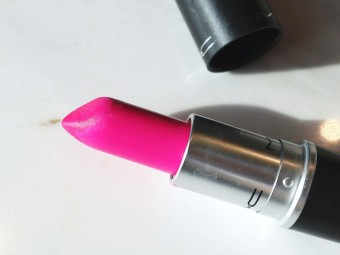

In [122]:
get_image_description()

함수를 실행하면 숫자를 입력하라는 칸이 뜹니다.

이때 0 ~ 173 사이의 정수 n을 입력하면 test데이터중 n+1번째 사진을 출력하고 이 사진의 톤 여부와 예측값을 제시해줍니다.